## Video Game Console Analysis 

## Introduction

The goal of analyzing this data is to identify certain trends that can help dictate the overall success of a specific gaming system. The data contains information that dates back as far as 2016, including user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. The dataset also contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

## Importing Data

In [1]:
# Importing Libraries 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import math


## Data Preparation 

In [2]:
# Importing Data 

filepath = 'games.csv'
column_names = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

try:
    df_games = pd.read_csv(filepath, header=0, names=column_names)
except FileNotFoundError as e:
    print(f"The file at [{filepath}] was not found. The following error: {e} occurred.\nTry again!")
else:
    print(f"The file at the filepath [{filepath}] was imported.")
        

The file at the filepath [games.csv] was imported.


In [3]:
# Initial observations
df_games.info()
df_games.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Checking for the percentage of missing values to see how they impact each column

mis_values = df_games.isnull().sum().to_frame('missing_values')
mis_values['%'] = round(df_games.isnull().sum()/len(df_games), 3)
mis_values.sort_values(by='%', ascending=False)

,missing_values,%
critic_score,8578,0.513
rating,6766,0.405
user_score,6701,0.401
year_of_release,269,0.016
name,2,0.000
platform,0,0.000
genre,2,0.000
jp_sales,0,0.000
eu_sales,0,0.000
na_sales,0,0.000


**Observations**

The data set has 11 columns with each containing specific information about various video games. After inspecting the raw data, a few columns have incorrect data types that need to be changed for further analysis. 

The year_of_release column is currently under float64 data type. Needs to be int64.
User_score column is currently object data type. Needs to be a numerical data type. 

Several other columns have missing values that need to be dealt with. 

For `name`, `genre`, and `rating`, missing values will be addressed using by either dropping or replacing the values:
    - For the categorical `rating` column, missing values will be filled with the string `'unknown'`. Since these columns primarily serve to categorize data, introducing an `'unknown'` category for each won't harm the dataset. Removing these values would severely impact dataset integrity due to their prevalence.
    - For the columns `critic_score`, `user_score`, and `year_of_release`, missing values will be addressed using dispersion methods such as mean or median:
    - The `year_of_release` column will be filled with the median value for that column. This approach, impacting approximately 200 records, maintains data integrity. However, for a larger number of missing values, it might pose challenges.\n,
    - For missing `user_score` values, we will replace them with the mean for that column. Since the value ranges between 1 and 10, excluding zero, the mean is expected to be relatively stable and can effectively fill missing values in that column.
      - The string value `'tbd'` will be converted to `NaN` (missing value) and then replaced with the mean, similar to other values. Considering that the user score typically falls between 1 and 10, `'tbd'` can be interpreted as missing data. To ensure this distinction is preserved for future analysis, a new binary column named `score_is_tbd` will be created. In this column, `'tbd'` will be represented as `1`, indicating missing or to-be-determined scores, while actual scores or `NaN` values will be represented as `0`.
    - For `critic_score`, missing values will be grouped by `genre` and `rating` and replaced with the median for those groups, providing a more contextualized approach to handling data. Any remaining missing values will be grouped by the `year_of_release` column and filled with the median as well.

In [5]:
# Fill name and genre missing values
df_games.dropna(subset=['name', 'genre'], inplace=True)

# Fill rating column missing values
df_games['rating'] = df_games['rating'].fillna('unknown')

# Fill year_of_release missing values and convert data type
df_games['year_of_release'].fillna(df_games['year_of_release'].median(), inplace=True)
df_games['year_of_release'] = df_games['year_of_release'].astype('int')

# Fill critic_score missing values 
df_games['critic_score'] = df_games['critic_score'].fillna(df_games.groupby(['genre', 'rating'])['critic_score'].transform('median'))
df_games['critic_score'].fillna(df_games['critic_score'].median(), inplace=True)

# Fill user_score missing values
df_games.insert(10, 'score_is_tbd', np.where(df_games['user_score'] == 'tbd', 1, 0))
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games['user_score'] = round(df_games['user_score'].fillna(df_games['user_score'].mean()), 2)

df_games.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,score_is_tbd,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.00,0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70.0,7.13,0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.30,0,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.00,0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,75.0,7.13,0,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,68.0,7.13,0,unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.50,0,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.60,0,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.40,0,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,67.0,7.13,0,unknown


In [6]:
# Calculating total sales for each game
df_games.insert(8, 'total_sales', df_games['na_sales'] + df_games['jp_sales'] + df_games['eu_sales'] + df_games['other_sales'])
df_games.insert(0, 'game_id', df_games.index)

df_games.head(30)

,game_id,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,score_is_tbd,rating
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.00,0,E
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,70.0,7.13,0,unknown
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.30,0,E
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.00,0,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,75.0,7.13,0,unknown
5,5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,68.0,7.13,0,unknown
6,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.50,0,E
7,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.60,0,E
8,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.40,0,E
9,9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,67.0,7.13,0,unknown


In [7]:
# Checking for duplicates 
df_games.duplicated().sum()

0

In [8]:
# Observing data agin to make sure everything is correct

df_games.info()
df_games.head(30)

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_id          16713 non-null  int64  
 1   name             16713 non-null  object 
 2   platform         16713 non-null  object 
 3   year_of_release  16713 non-null  int64  
 4   genre            16713 non-null  object 
 5   na_sales         16713 non-null  float64
 6   eu_sales         16713 non-null  float64
 7   jp_sales         16713 non-null  float64
 8   other_sales      16713 non-null  float64
 9   total_sales      16713 non-null  float64
 10  critic_score     16713 non-null  float64
 11  user_score       16713 non-null  float64
 12  score_is_tbd     16713 non-null  int64  
 13  rating           16713 non-null  object 
dtypes: float64(7), int64(3), object(4)
memory usage: 1.9+ MB


,game_id,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,score_is_tbd,rating
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.00,0,E
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,70.0,7.13,0,unknown
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.30,0,E
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.00,0,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,75.0,7.13,0,unknown
5,5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,68.0,7.13,0,unknown
6,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.50,0,E
7,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.60,0,E
8,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.40,0,E
9,9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,67.0,7.13,0,unknown


## Data Analysis 

After initial reviews of the data, this feels like important information for industry trend tracking as well as for future marketing purposes for new video game releases. This dataset provides a vast sample size for analysis. Sports and Role-Playing games seem to be the most popular selling gaming genre.

<function matplotlib.pyplot.show(close=None, block=None)>

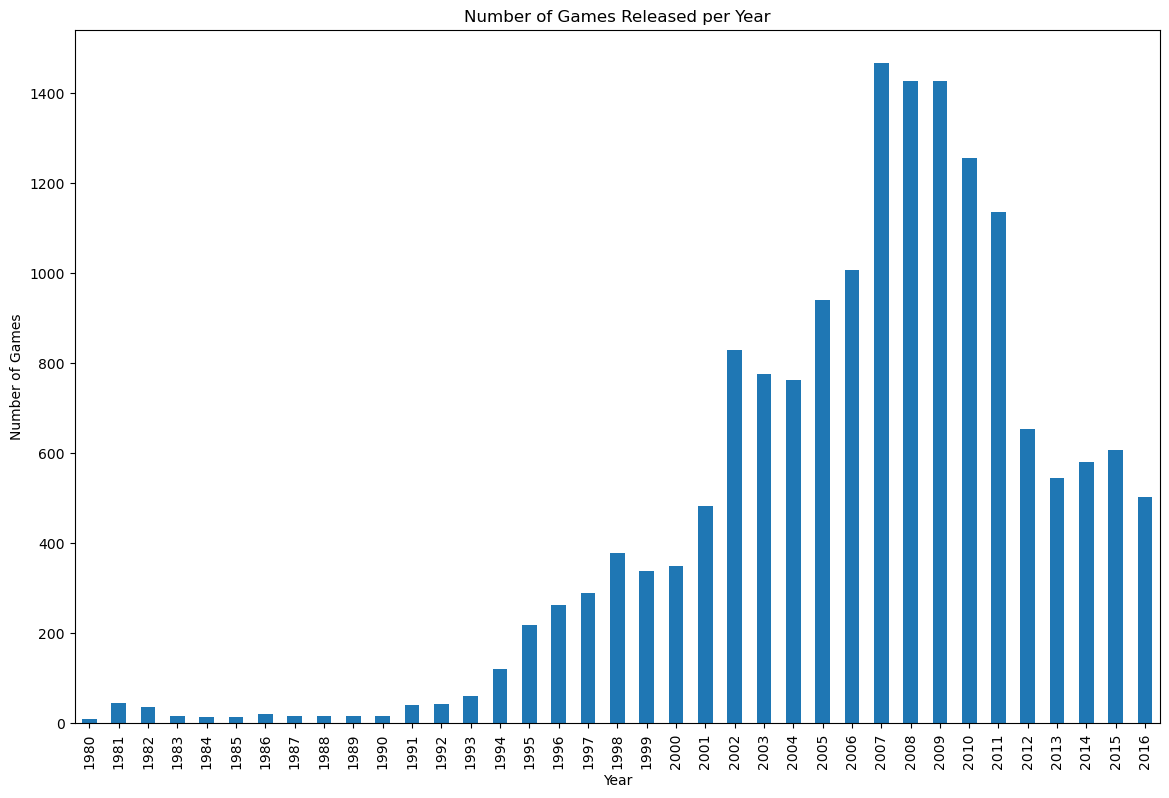

In [9]:
# Finding how many games were released per year
games_per_year = df_games.groupby('year_of_release')['game_id'].count()
games_per_year.plot(kind='bar', x='year_of_release', title="Number of Games Released per Year", xlabel="Year", ylabel="Number of Games", figsize=(14,9))
plt.show

## Platform to Platform Sales 

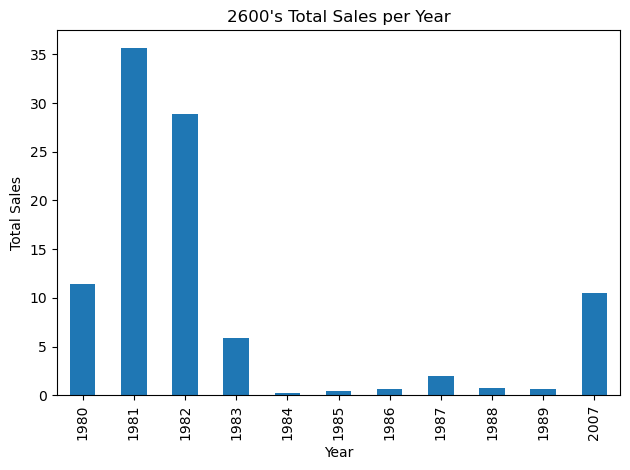

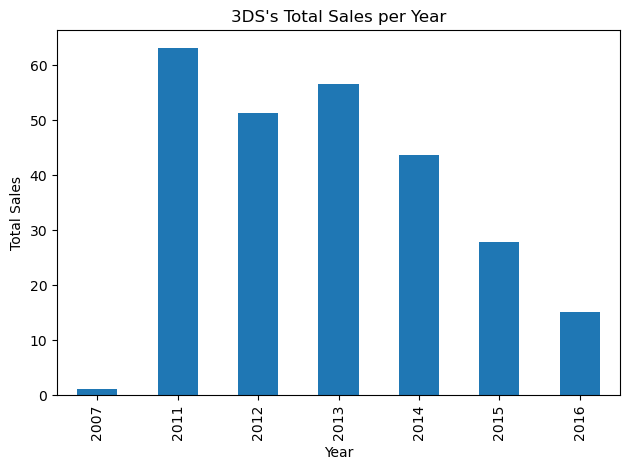

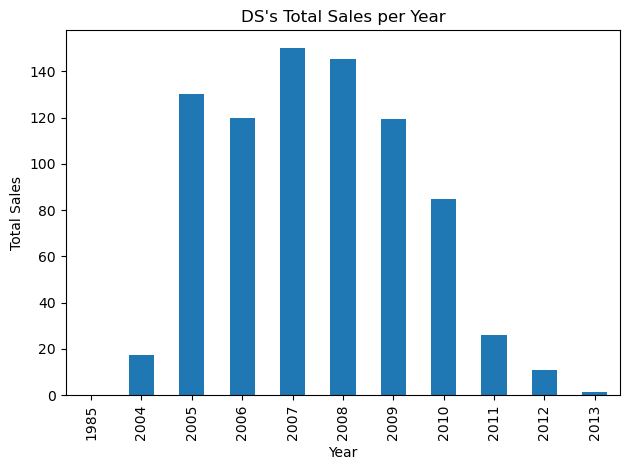

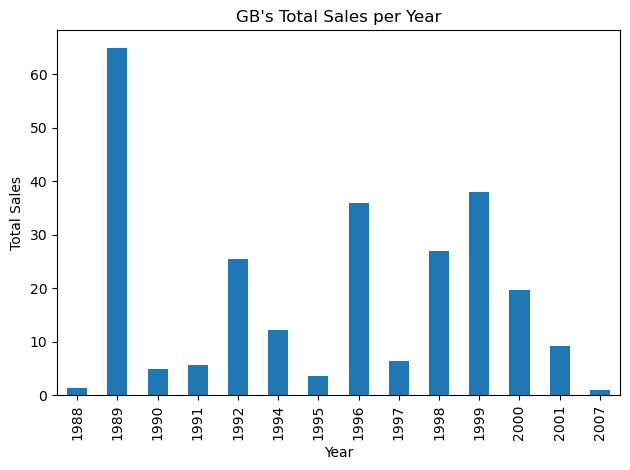

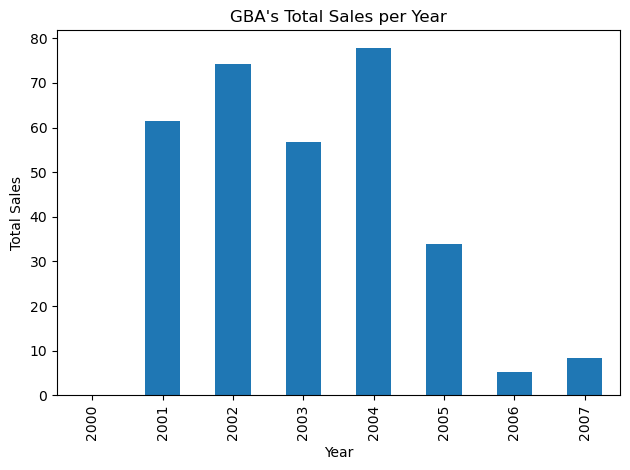

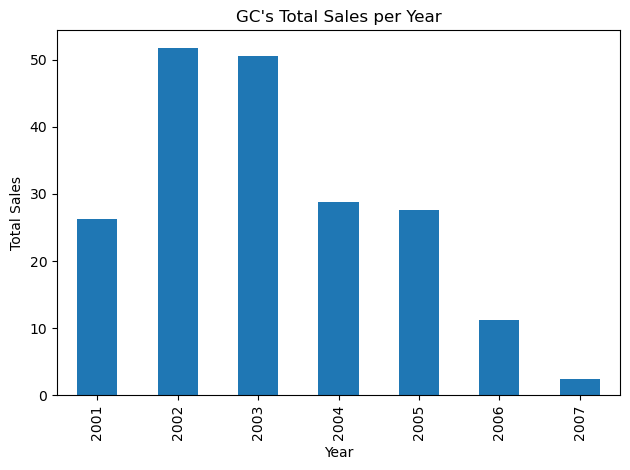

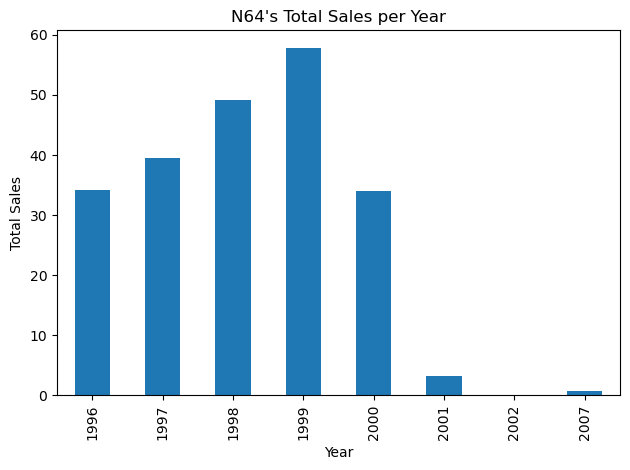

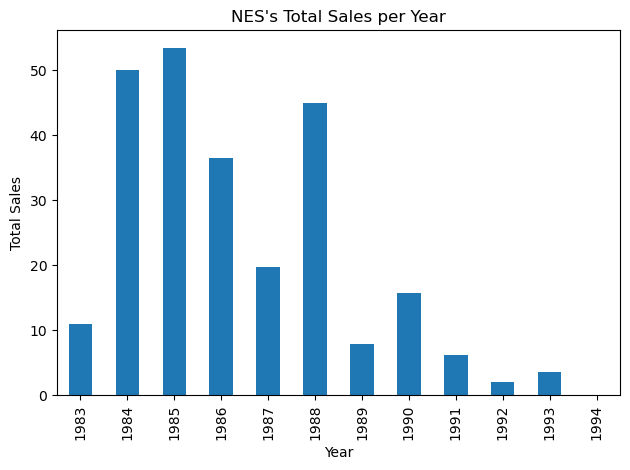

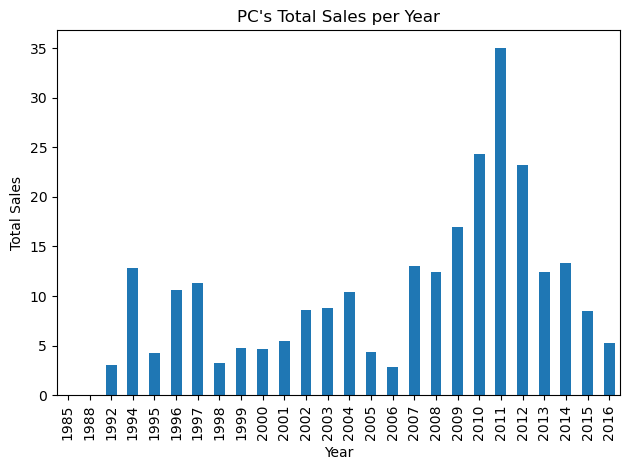

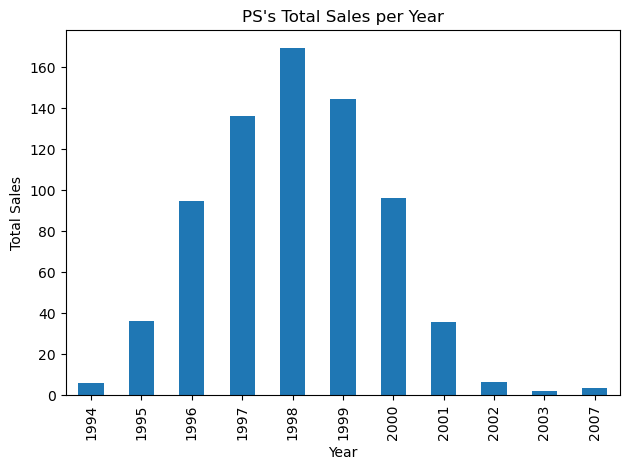

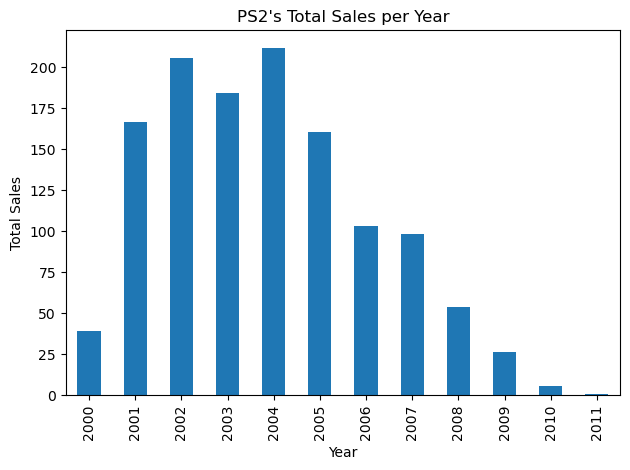

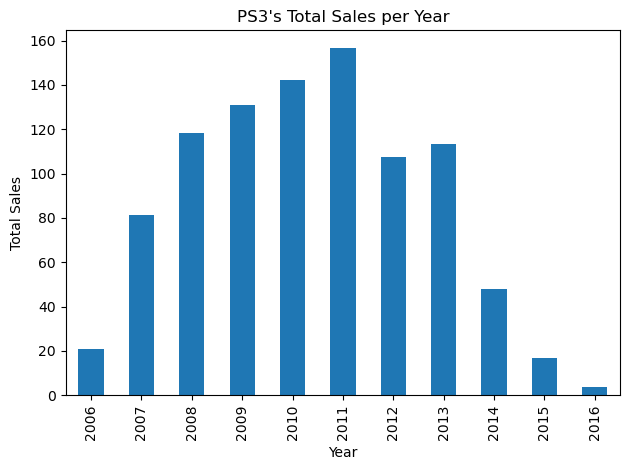

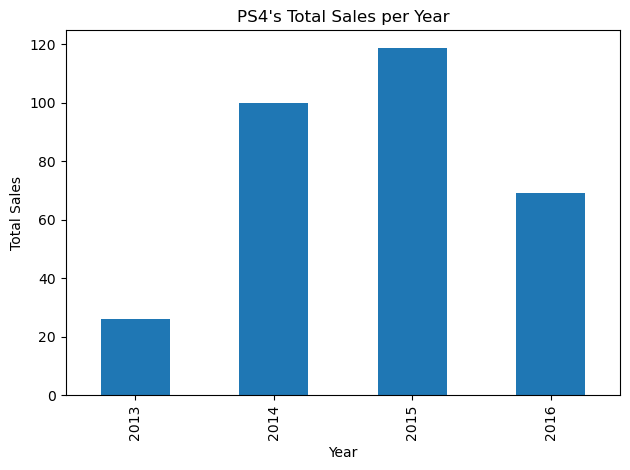

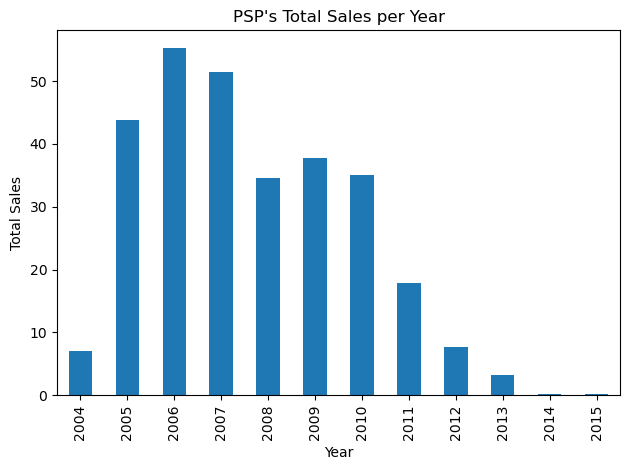

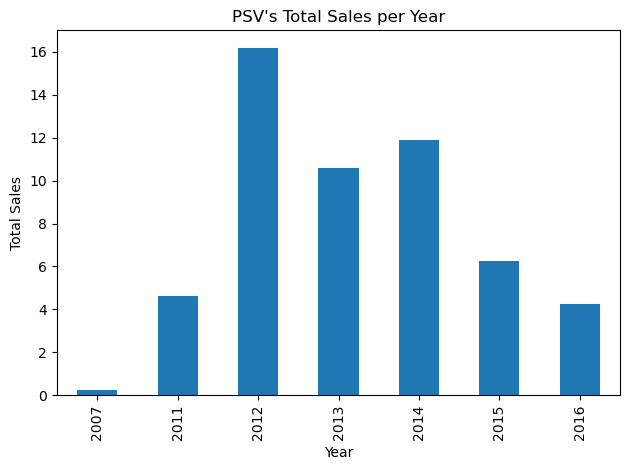

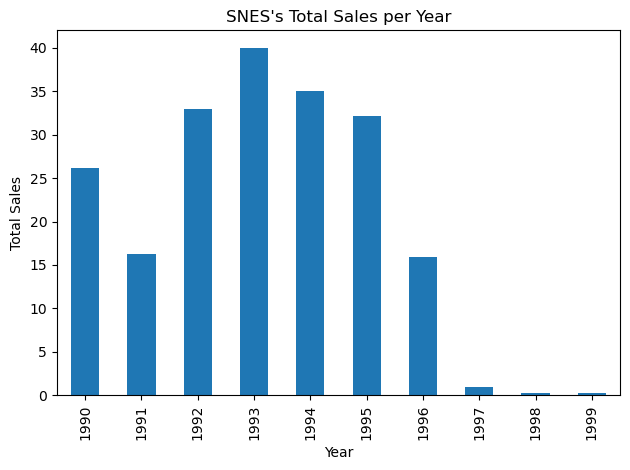

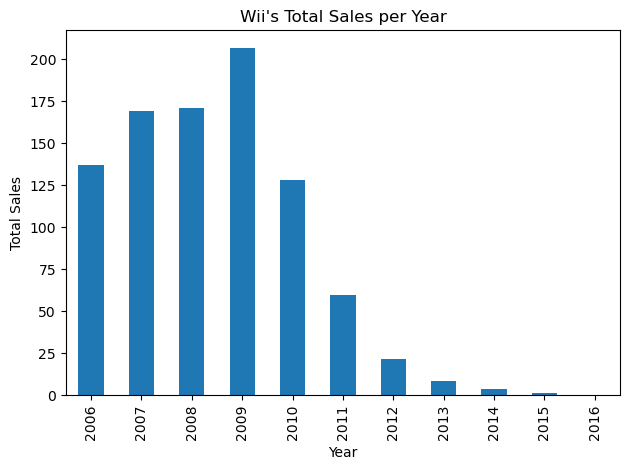

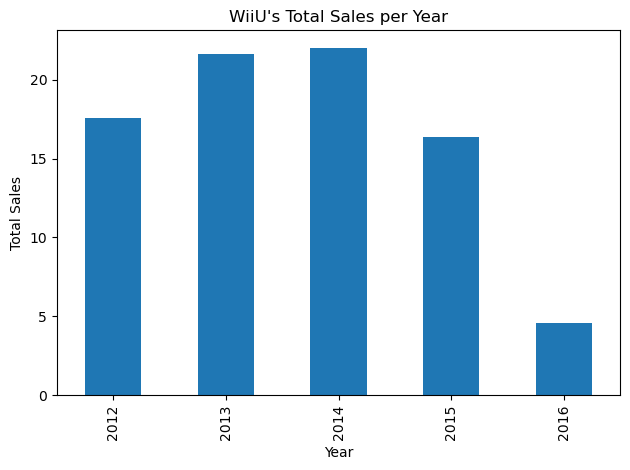

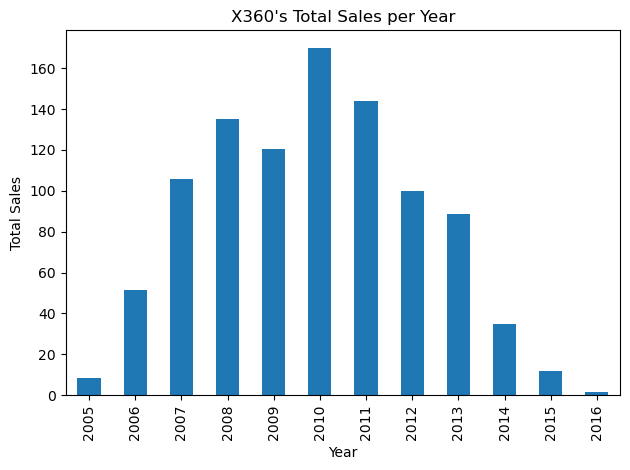

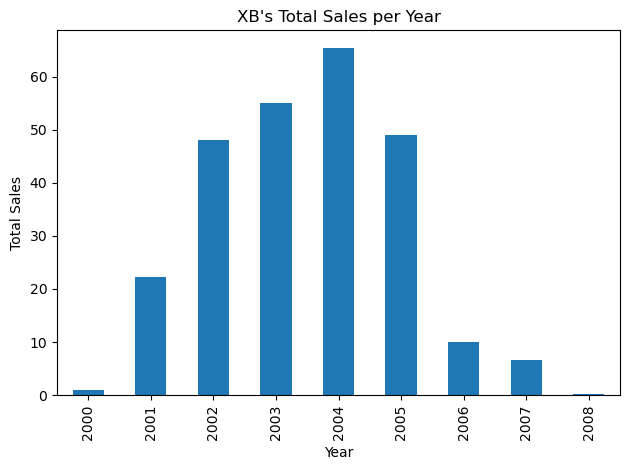

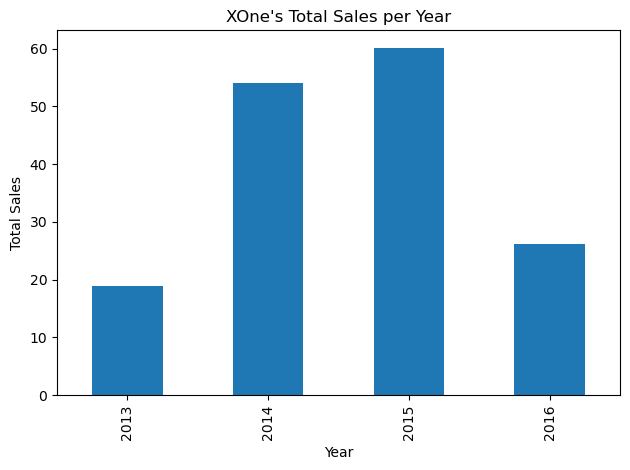

In [10]:
# Grouping data by platform and counting total sales

plat_sales = df_games.groupby('platform')['total_sales'].sum()

# Filtering data to only show platforms with 50 million in sales & create a list
plat_over_65 = plat_sales[plat_sales > 50].index.tolist()

# Filtering out originial df to only show platforms that sold over 65 million 
df_games_filtered = df_games[df_games['platform'].isin(plat_over_65)]

# Group filtered df by platform 
grouped_platform = df_games_filtered.groupby('platform')

# Determine total sales grouped platform
plat_sales = grouped_platform['total_sales'].sum().reset_index()

#PLotting

for platform, group_data in grouped_platform:
    group_data.groupby('year_of_release')['total_sales'].sum().plot(kind='bar', title=f"{platform}'s Total Sales per Year")
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.show()

In [11]:
# Find the platforms leading in sales 
plat_sales = plat_sales.sort_values(by='total_sales', ascending=True)
plat_sales 

,platform,total_sales
14,PSV,54.07
17,WiiU,82.19
0,2600,96.98
20,XOne,159.32
5,GC,198.93
15,SNES,200.04
6,N64,218.68
7,NES,251.05
3,GB,255.46
19,XB,257.74


In [12]:
# Building a table to display total sales for all platforms 

total_sales_table = df_games_filtered.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum', fill_value=0)

display(total_sales_table)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,10.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.19,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,150.28,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.97,...,1.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,8.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
N64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NES,0.00,0.00,0.00,10.96,50.08,53.44,36.41,19.76,45.01,7.85,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PC,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.03,0.00,...,13.04,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25


### Observations

After reviewing the graphs, it appears to me that when a console releases to the public, it has relatively strong sales numbers for the first 4-5 years then sales start to taper off. This information suggests that people are either getting tired of the console or other new consoles are being released every 5-6-7 years. It could also be a result of both instances happening. 

### Determining Data 

If we are supposed to build a model for 2017 console marketing purposes, I think that including data back to 2014 would be sufficient considering massive technology evolution from 1980-2012. Consoles released starting from this year expereince large, robust sales figures that companies are aimimng to acheive. The console's themselves are also 10x more versatile than consoles released just 6 years prior. Three consoles are starting to emerge above the rest, Xbox One, PS4, and PC. Sales for these consoles starting around 2010 really begin to separate from the pack. To summarize, to build an accurate model for 2017, we will only be using data from 2014 on. 

Platforms Leading in all time Sales:

- PS4
- GBA
- DS
- XBOX 360
- PS 2
- PS 3
- Wii
- PS

Platforms Growing:

- PS4
- PC
- Xbox one

Platforms Shrinking:

- WiiU
- PS2
- PS
- PS3
- PSP
- Xbox 360


## Box Plot for Global Sales 

<Figure size 1200x600 with 0 Axes>

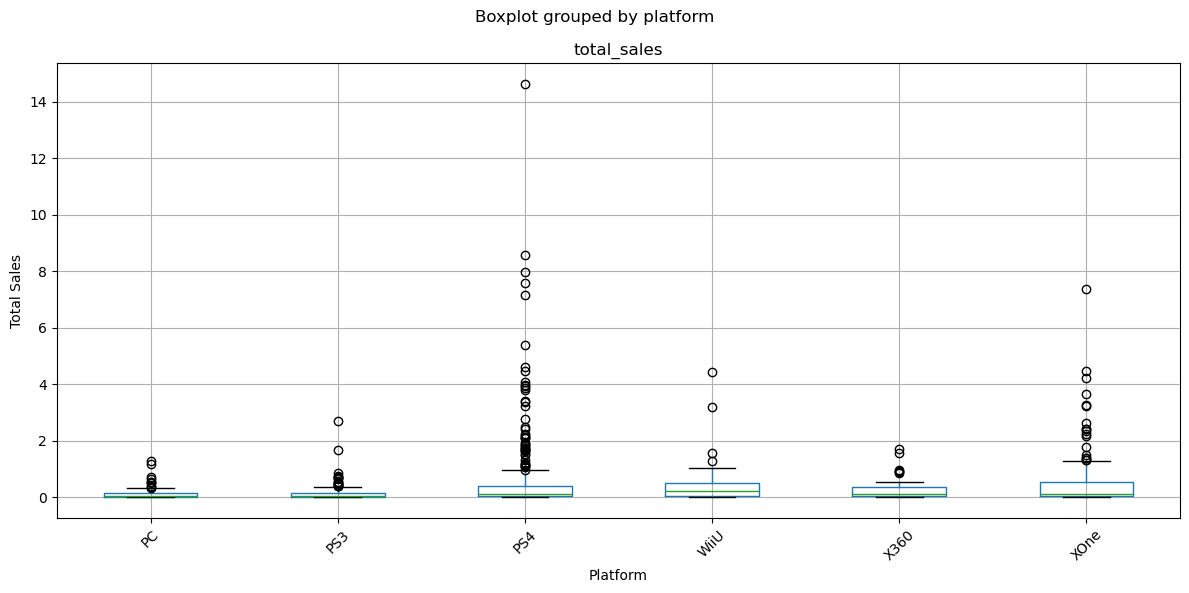

In [13]:
# Filtering data to only include top selling consoles for 2014, 2015, 2016.

platform_list = ['WiiU', 'X360', 'XOne', 'PS3', 'PS4', 'PC']

platform_sales_14_15_16 = df_games_filtered[(df_games_filtered['platform'].isin(platform_list)) & (df_games_filtered['year_of_release'] > 2014)] 

# Creating BoxPLot
plt.figure(figsize=(12, 6))
platform_sales_14_15_16.boxplot(column='total_sales', by='platform', figsize=(12, 6))
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations

Going only as far back as 2014 with this dataset means that moving forward, we will be working with smaller sample sizes of data for these video game consoles. PS4 and Xbox One are the two outliers for most popular selling gaming console across the globe. PC and PS3 sales show that a trend is forming. Showing this type of upward growth momentum is critical for capitalizing on future success. 

## Correlation Between User Score and Total Sales (Xbox One)

The correlation between 'user_score' and 'total_sales' in Xbox One is -0.048615576074313493


<Axes: title={'center': 'Correlation Between User Score and Total Sales for Xbox One'}, xlabel='User Score', ylabel='Total Sales'>

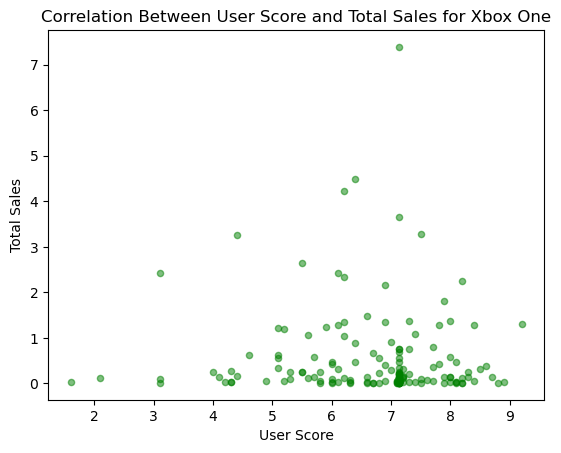

In [14]:
# Building scatter plot for correlation between user score and platform 

Xbox_one = platform_sales_14_15_16[platform_sales_14_15_16['platform'] == 'XOne']
print(f"The correlation between 'user_score' and 'total_sales' in Xbox One is {Xbox_one['total_sales'].corr(Xbox_one['user_score'])}")

Xbox_one.plot(kind='scatter', x='user_score', y='total_sales', xlabel='User Score', ylabel='Total Sales', title='Correlation Between User Score and Total Sales for Xbox One', alpha=0.5, color="green")


The scatter plot depicts a negative correlation between user score and platform total sales. The two factors are in no way correlated. 

The correlation coefficient between user_score and total_sales for PC is: 0.11267756908835316


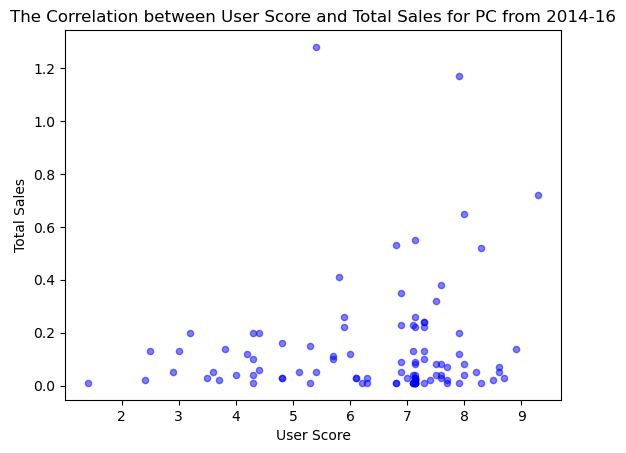

The correlation coefficient between user_score and total_sales for PS3 is: -0.3045076479476734


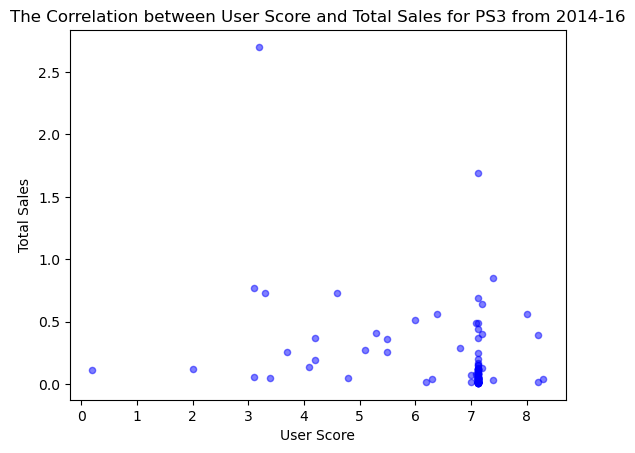

The correlation coefficient between user_score and total_sales for PS4 is: -0.05496562749565273


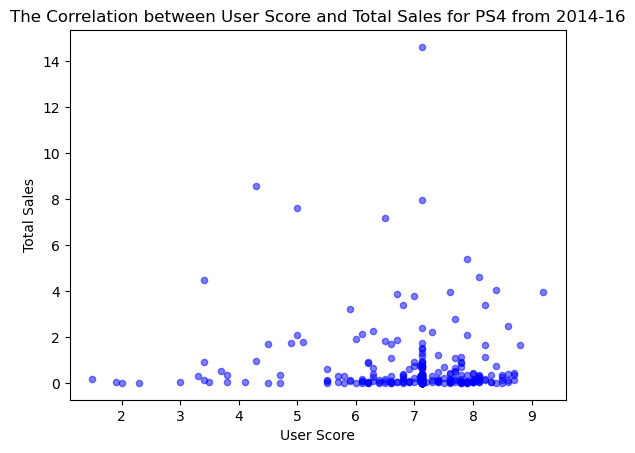

The correlation coefficient between user_score and total_sales for WiiU is: 0.339568294185585


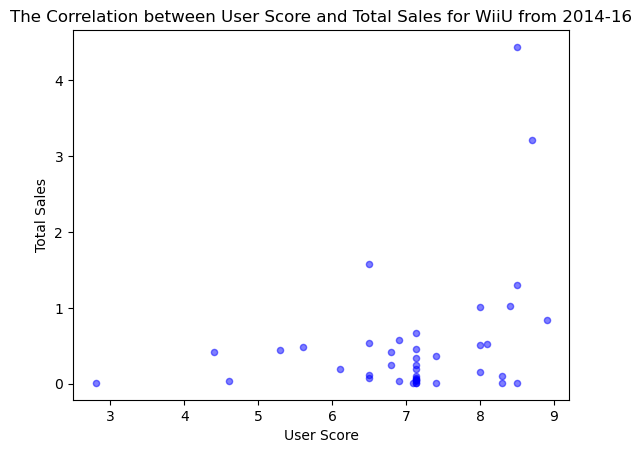

The correlation coefficient between user_score and total_sales for X360 is: -0.22565454425770476


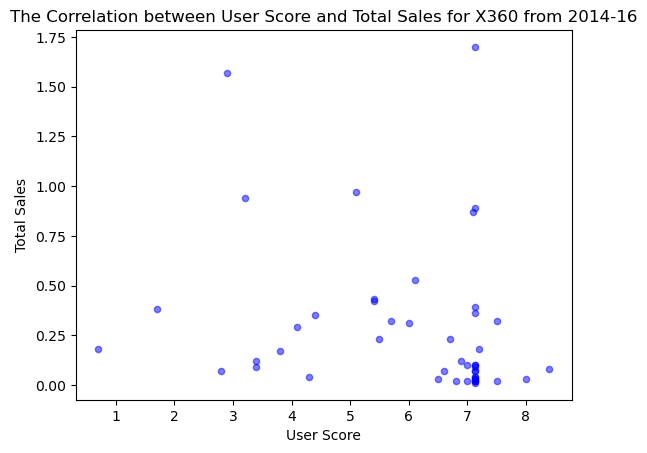

The correlation coefficient between user_score and total_sales for XOne is: -0.048615576074313493


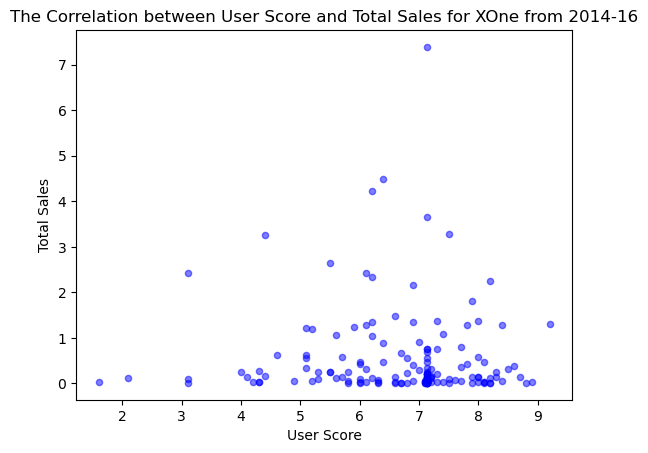

In [15]:
# Looking for a correlation from other platforms

for platform in np.sort(platform_sales_14_15_16['platform'].unique()):
    grouped_data = platform_sales_14_15_16[platform_sales_14_15_16['platform'] == platform]
    print(f"The correlation coefficient between user_score and total_sales for {platform} is: {grouped_data['total_sales'].corr(grouped_data['user_score'])}")
    grouped_data.plot(kind='scatter', x='user_score', y='total_sales', xlabel='User Score', ylabel='Total Sales', title=f'The Correlation between User Score and Total Sales for {platform} from 2014-16', alpha=0.5, color='blue')
    plt.show()

### Observations

The correlation between user score and total sales differes from each console. For newer, emerging consoles like PS4 and XBOX One, the correlation is negative and there really isn't any resemblance of reltaion. However, for Wii and WiiU, the correlation between the two factors are more legitmate when you see how user score affects total sales. 

## General Distribution by Genre 

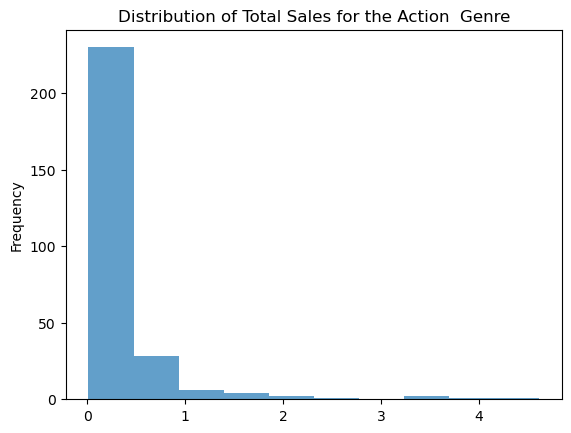

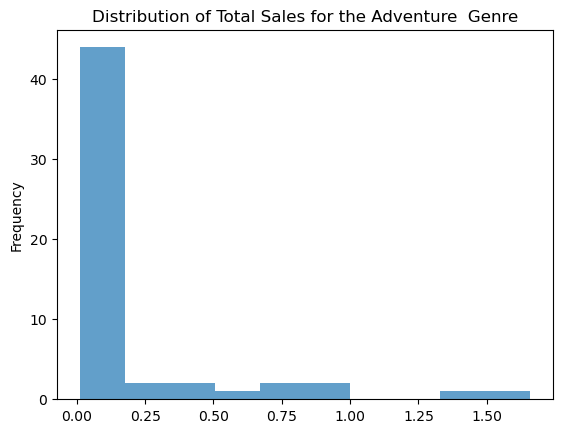

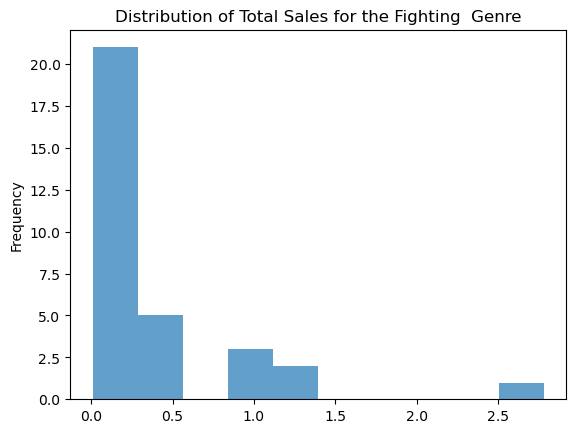

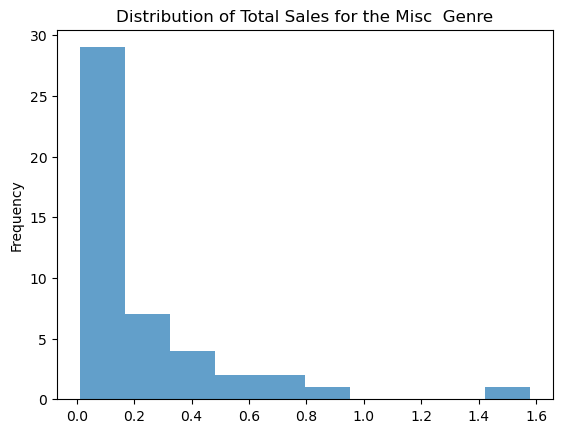

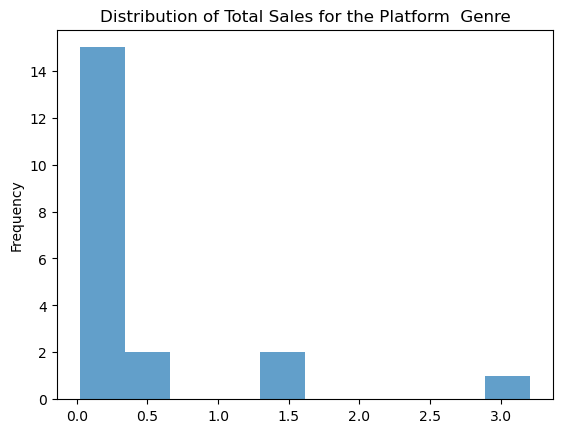

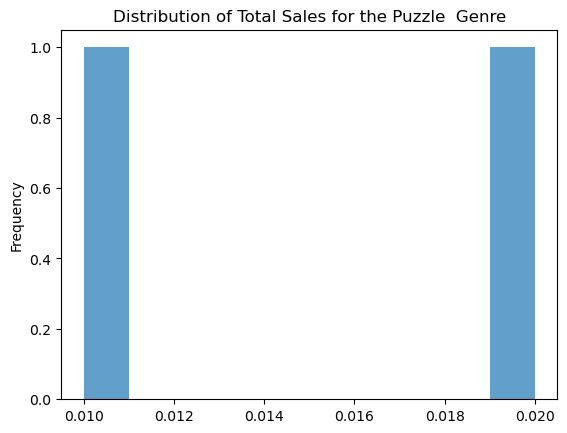

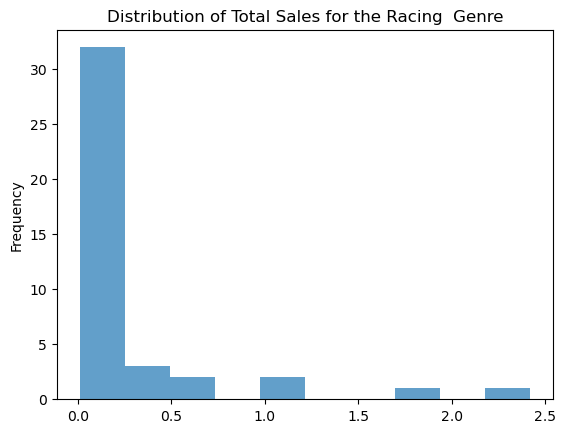

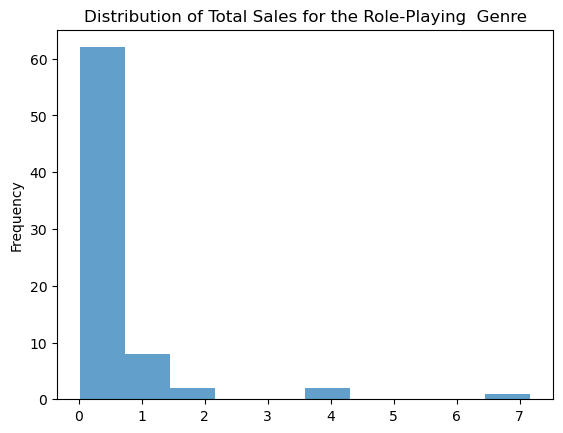

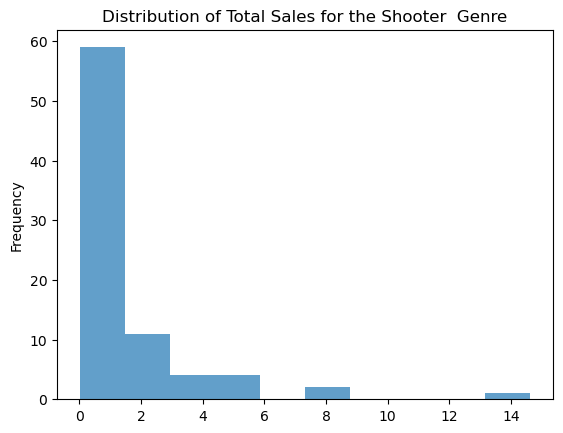

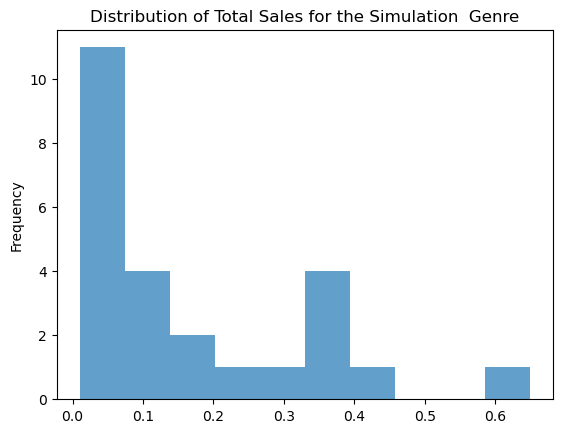

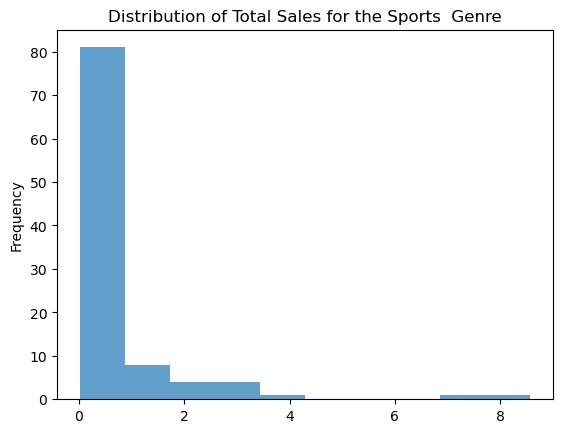

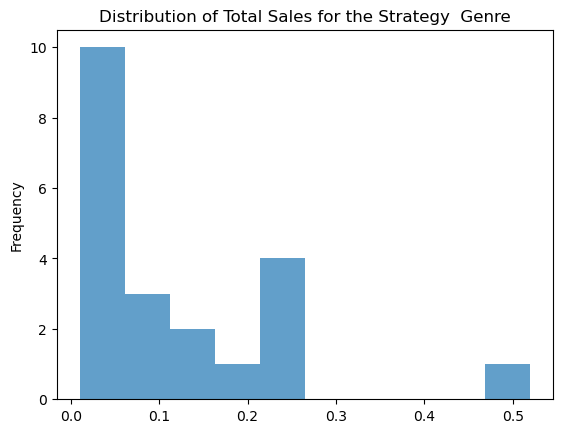

In [20]:
for genre in np.sort(platform_sales_14_15_16['genre'].unique()):
    platform_sales_14_15_16[platform_sales_14_15_16["genre"] == genre].plot(kind='hist', y='total_sales', alpha=0.7, title=f'Distribution of Total Sales for the {genre}  Genre', legend=False)
    plt.show()

### Observations

The top selling genres are Sports, Shooter, Role-Playing, Racing, and Fighting. Some of the most popular games that have ever been made have been sports games like FIFA and MADDEN. Numerous best sellers have been made in the shooter and role-playing game genres like Call of Duty and Fallout. Games that require a little bit more criticial thinking, like Strategy and Puzzle, are less popular and therefore have weaker sales numbers.

## User Profile by Region

In [21]:
# Listing the top 5 consoles by sales
top_5_platforms = ["PS2", "PS3", "X360", "Wii", "DS"]
top_5_platform_df = df_games_filtered[df_games_filtered['platform'].isin(top_5_platforms)]

# Finding the total sales in each region by platform
grouped_top_5_sales = top_5_platform_df.groupby(['platform']).agg({"jp_sales": "sum", "na_sales": "sum", "eu_sales": "sum"})

# Finding market share for each region
def find_market_share(region: str, df: object) -> int:
    total_sales = df[f'{region}_sales'].sum()
    df[f'{region}_market_share'] = (df[f'{region}_sales'] / total_sales) * 100

    
find_market_share('jp', grouped_top_5_sales)
find_market_share('eu', grouped_top_5_sales)
find_market_share('na', grouped_top_5_sales)

grouped_top_5_sales


,jp_sales,na_sales,eu_sales,jp_market_share,eu_market_share,na_market_share
platform,,,,,,
DS,175.57,382.40,188.89,36.828746,13.575145,15.550405
PS2,139.20,583.84,339.29,29.199530,24.384091,23.742019
PS3,80.19,393.49,330.29,16.821195,23.737279,16.001383
Wii,69.33,496.90,262.21,14.543128,18.844506,20.206580
X360,12.43,602.47,270.76,2.607401,19.458978,24.499614


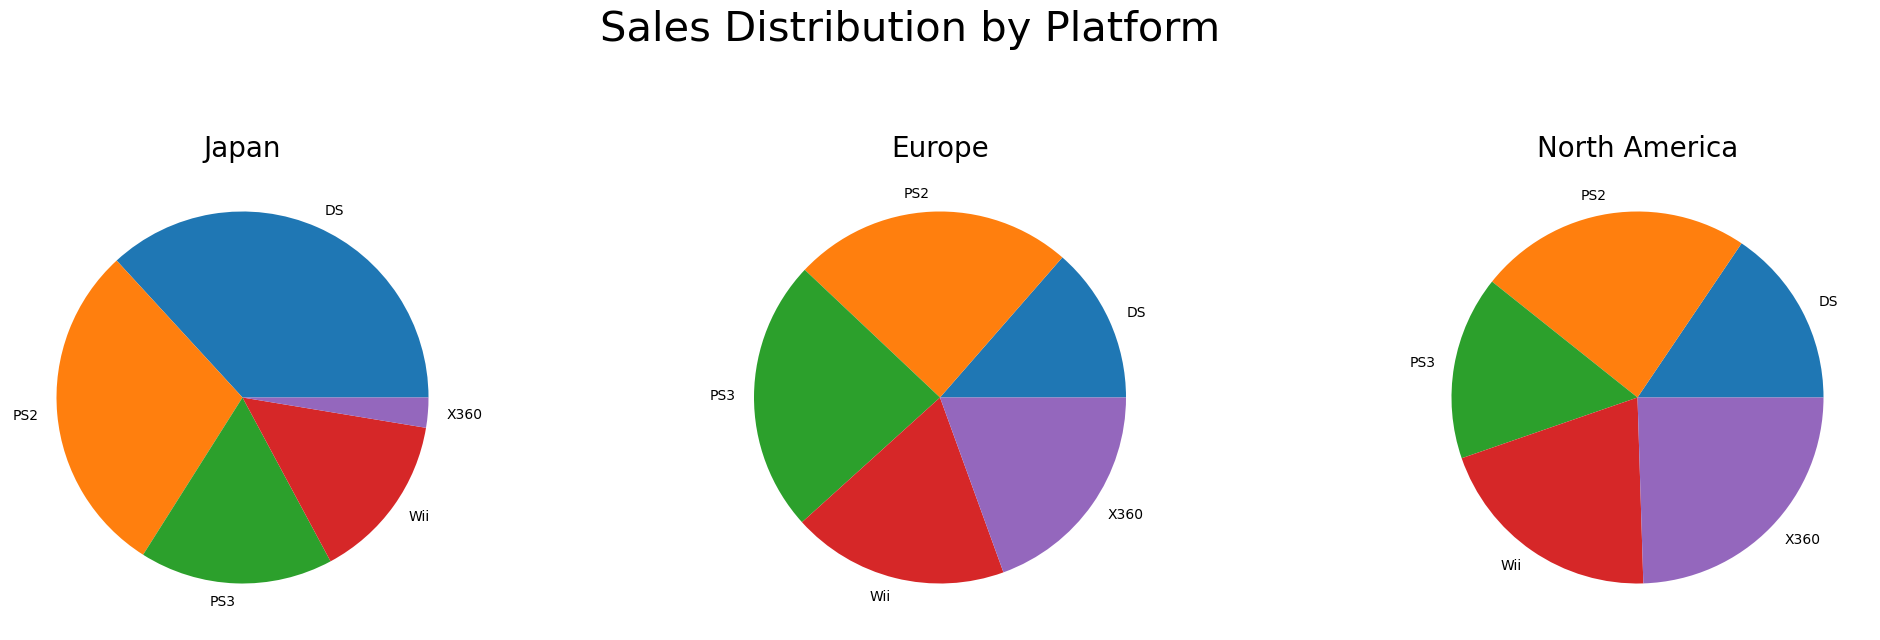

In [23]:
# Market Share based on Platform 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24, 8))
fig.suptitle('Sales Distribution by Platform', fontsize=30)
plt.subplots_adjust(wspace=0.5)

ax1.pie(grouped_top_5_sales['jp_market_share'], labels=grouped_top_5_sales.index)
ax1.set_title('Japan', fontsize=20)
    
ax2.pie(grouped_top_5_sales['eu_market_share'], labels=grouped_top_5_sales.index)
ax2.set_title('Europe', fontsize=20)
    
ax3.pie(grouped_top_5_sales['na_market_share'], labels=grouped_top_5_sales.index)
ax3.set_title('North America', fontsize=20)
    
plt.show()


### Observations

Sony Products like DS and Playsation have the majority of market share in their home country of Japan, while Xbox360 has a very small market share. The story is different as you move to Europe and North America. Xbox360 along with PS2, have majority of the market share in. North America. Europe seems to have evenly distributed market share among all consoles. 

## Top Genres in each Region 

In [24]:
# listing top 5 genres 

top_five_genres = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=True).tail(10).index.to_list()

# Filtering Df to only include top 5 genres 
top_genres_df = df_games_filtered[df_games_filtered['genre'].isin(top_five_genres)]

# Aggregating values 
top_genres_grouped = top_genres_df.groupby('genre').agg({"jp_sales": "sum", "na_sales": "sum", "eu_sales": "sum"})

# Finding Market Share 
find_market_share('jp', top_genres_grouped)
find_market_share('na', top_genres_grouped)
find_market_share('eu', top_genres_grouped)

top_genres_grouped

,jp_sales,na_sales,eu_sales,jp_market_share,na_market_share,eu_market_share
genre,,,,,,
Action,159.94,876.74,518.35,13.808525,20.870488,22.463121
Fighting,76.10,218.87,98.75,6.570143,5.210124,4.279412
Misc,106.79,407.27,212.74,9.219785,9.694920,9.219262
Platform,128.59,432.51,196.00,11.101902,10.295749,8.493820
Puzzle,56.29,122.87,50.01,4.859834,2.924877,2.167224
Racing,53.41,358.04,235.84,4.611187,8.523017,10.220319
Role-Playing,349.39,330.81,188.71,30.164815,7.874816,8.177902
Shooter,34.31,592.24,317.34,2.962176,14.098066,13.752188
Simulation,62.13,181.92,113.52,5.364034,4.330542,4.919482


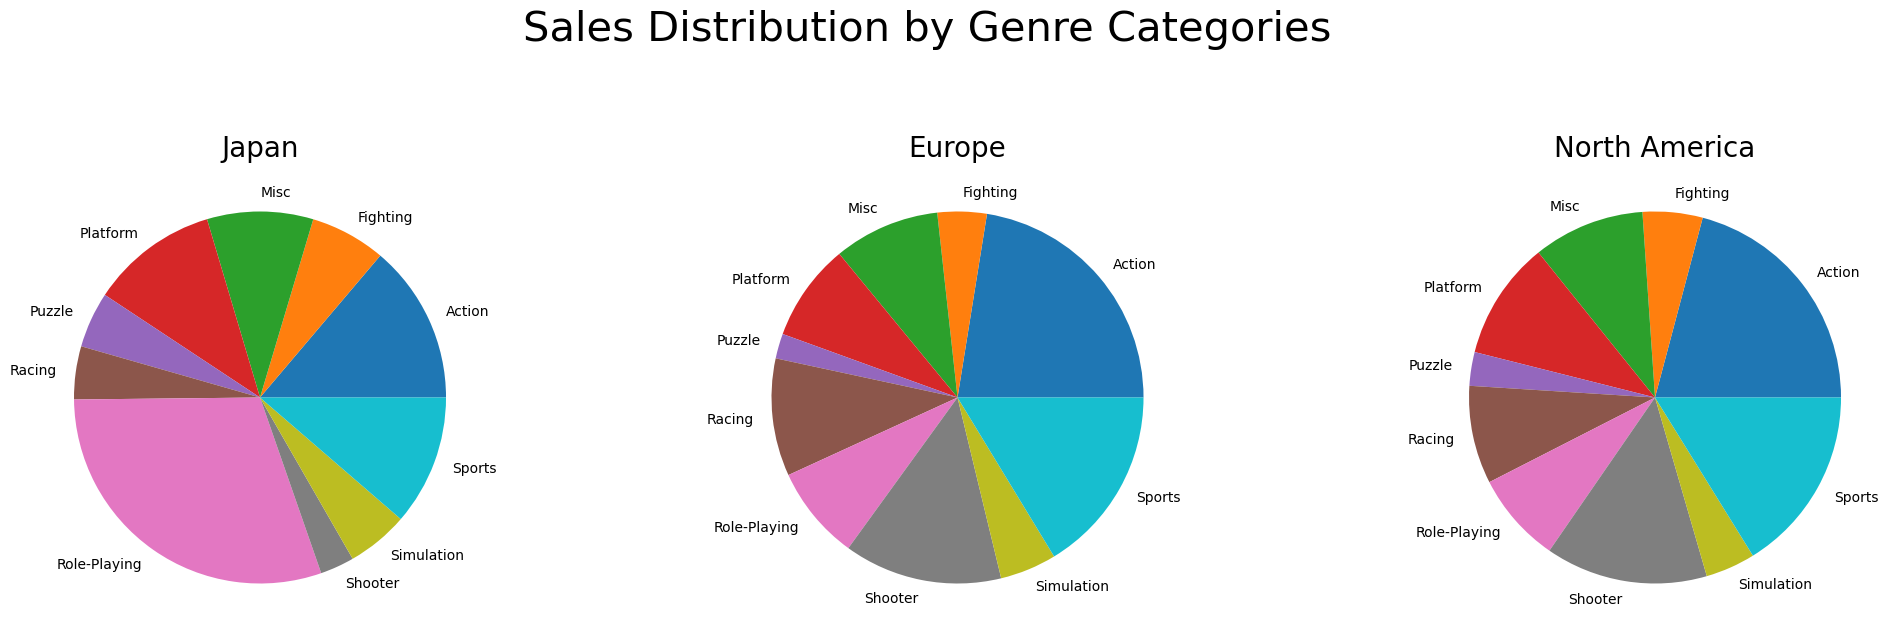

In [33]:
# Plotting Market share for top Genres

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24, 8))
fig.suptitle('Sales Distribution by Genre Categories', fontsize=30)
plt.subplots_adjust(wspace=0.5)

ax1.pie(top_genres_grouped['jp_market_share'], labels=top_genres_grouped.index)
ax1.set_title('Japan', fontsize=20)

ax2.pie(top_genres_grouped['eu_market_share'], labels=top_genres_grouped.index)
ax2.set_title('Europe', fontsize=20)

ax3.pie(top_genres_grouped['na_market_share'], labels=top_genres_grouped.index)
ax3.set_title('North America', fontsize=20)
    
plt.show()

### Observations

The Role Playing Genre takes up tremendous market share in Japan, while shrinking considerably in both Europe and North America. Action and Sports are stronger in Europe and North America while lagging behind in Japan. The Shooter genre has a considerable amount of market share in Europe and North America but almost disappears in Japan. The same could be said for the Racing genre as well. 

In [34]:
# Aggregating values 

top_grouped_ratings = df_games_filtered.groupby('rating').agg({"jp_sales": "sum", "na_sales": "sum", "eu_sales": "sum"})

# Using the market share function used prior 

find_market_share('jp', top_grouped_ratings)
find_market_share('na', top_grouped_ratings)
find_market_share('eu', top_grouped_ratings)

top_grouped_ratings

,jp_sales,na_sales,eu_sales,jp_market_share,na_market_share,eu_market_share
rating,,,,,,
AO,0.00,1.26,0.61,0.000000,0.028806,0.025248
E,197.86,1291.97,710.20,15.826141,29.536481,29.395330
E10+,40.20,353.32,188.52,3.215460,8.077455,7.802883
EC,0.00,1.53,0.11,0.000000,0.034978,0.004553
K-A,1.46,2.56,0.27,0.116780,0.058526,0.011175
M,64.19,748.48,483.97,5.134337,17.111439,20.031622
RP,0.00,0.00,0.08,0.000000,0.000000,0.003311
T,149.04,759.23,426.79,11.921197,17.357201,17.664930
unknown,797.46,1215.80,605.48,63.786084,27.795114,25.060947


## Market Share by User Score 

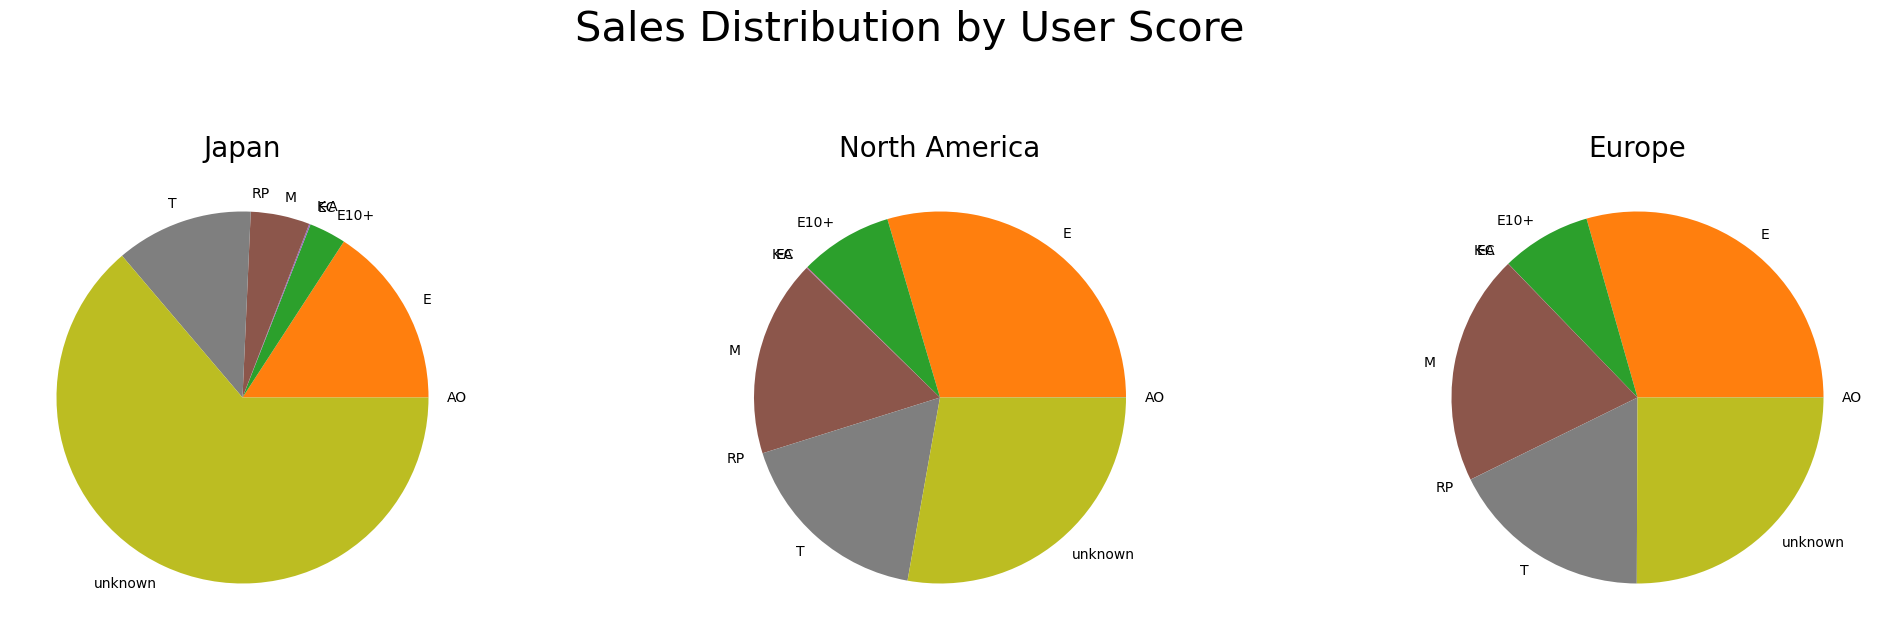

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24, 8))
fig.suptitle('Sales Distribution by User Score', fontsize=30)
plt.subplots_adjust(wspace=0.5)

ax1.pie(top_grouped_ratings['jp_market_share'], labels=top_grouped_ratings.index)
ax1.set_title('Japan', fontsize=20)

ax2.pie(top_grouped_ratings['na_market_share'], labels=top_grouped_ratings.index)
ax2.set_title('North America', fontsize=20)

ax3.pie(top_grouped_ratings['eu_market_share'], labels=top_grouped_ratings.index)
ax3.set_title('Europe', fontsize=20)

plt.show()

### Observations

Based off the graphs pictured above, there is room for debate on whether or not user score affects sales in certain parts of the world. If we exclude games with "unknown" score, there are stark differences in distribution by user score region to region. "E" rated games tend to have strong numbers across all three regions. This is probably a result of the fact that E rated games are marketed to the largest number of people who play video games. Upon further analysis, the distribution by user score in Europe and North America is almost identical. 

## Hypothesis Testing 

### Testing whether or not average user ratings of the Xbox One and PS4 platforms are the same

#### Null Hypothesis

H0: μXbox = μPS4

μPS4 = Represents the population mean of user ratings for the PS4 platform


μXbox = Represents the population mean of user ratings for the Xbox One platform

#### Alternative Hypothesis

H0: μXbox ≠ μPS4

#### Alpha Value

0.05

#### Explanation

The `null hypothesis` proposed is that the average user ratings for both Xbox One and PS4 platforms are identical, while the `alternative hypothesis` suggested they are different. A significance level of 5% was selected for testing these assumptions.

In [40]:
# Retreivng samples 
ps4_sample = df_games[df_games['platform'] == "PS4"]['user_score'].to_list()
xbox_one_sample = df_games[df_games['platform'] == "XOne"]['user_score'].to_list()

# Declaring alpha 
alpha = 0.05
_, pvalue1 = st.ttest_ind(ps4_sample, xbox_one_sample) #unpacking results 

print(f"The pvalue: {pvalue1}")

if pvalue1 < alpha:
    print(f"We reject the null hypothesis at a {alpha} significance level.")
else:
    print(f"We cannot reject the null hypothesis at a {alpha} significance level.")
        

The pvalue: 0.04294657441319361
We reject the null hypothesis at a 0.05 significance level.


## Testing whether or not the average use ratings of Role Playing and Shooter genres are different

#### Null Hypothesis

H0: μRole-Playing = μShooter

μRole-Playing = Represents the population mean of user ratings for the Role-Playing genre

μShooter = Represents the population mean of user ratings for the Shooter genre

#### Alternative Hypothesis

H0: μRole-Playing ≠ μShooter

#### Alpha Value

0.05

#### Explanation

The `null hypothesis` posited that the average user ratings for both Role-Playing and Shooter genre are identical, while the `alternative hypothesis` suggested they are different. A significance level of 5% was selected for testing these assumptions."

In [41]:
# Retreiving Samples 
role_sample = df_games[df_games['genre'] == "Role-Playing"]['user_score'].to_list()
shooter_sample = df_games[df_games['genre'] == "Shooter"]['user_score'].to_list()

# Declaring Alpha
alpha = 0.05
results = st.ttest_ind(role_sample, shooter_sample)
_, pvalue2 = results 

print(f"The pvalue: {pvalue2}")

if pvalue2 < alpha:
    print(f"We reject the null hypothesis at a {alpha} significance level.")
else: 
    print(f" We cannot reject the null hypothesis at a {alpha} significance level.")

The pvalue: 1.954055265117738e-14
We reject the null hypothesis at a 0.05 significance level.


## Conclusions

The provided dataset offered a tremendous amount of information to analyze and dissect for future marketing campaigns and industry trend tracking for video games and video game consoles. Upon analyzation of the data, one can deduce that the video game industry saw sustained growth over a multiple decade period. One could say that as technology evolved, so did video games and the gaming idustry. As technology becomes better, the games and the gaming consoles become better which lead to more overall sales. 

Looking through the data, there are platforms that tend to rise above the rest when it comes to sales distribution and those platforms are Xbox, Playstaion, and PC. Each one of these platforms expereinced immense growth and popularity from 2010 on. This data set also provides evidince that a game only sustains viral popularity and healthy sales growth for about 6-7 years before tapering off. 

Interestingly enough, it was determined that user score was not correlated with how well a particular item sold. This varies depending on what region you are looking at. Certain preferences in genre and console are more similar than what you might think. In both Europe and North America, the total sales distribution by genre is almost exactly the same. It was discovered that ratings of games influence total sales in each region, specifically in Japan. Games rated M and E have better sales than games rated T and up. This difference isn't that noteable in Europe or North America. 


In conclusion, anyone viewing this data can surmise that the video game industry is here to stay. It evolves along with the course of technology, with preferences for different games and gaming consoles continuing to fluctuate around the globe. 